In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('student-por.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
df.shape

(649, 33)

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## checking for null values


In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There is no null values in any feature so we don't need to impute any of the feature

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

<AxesSubplot:>

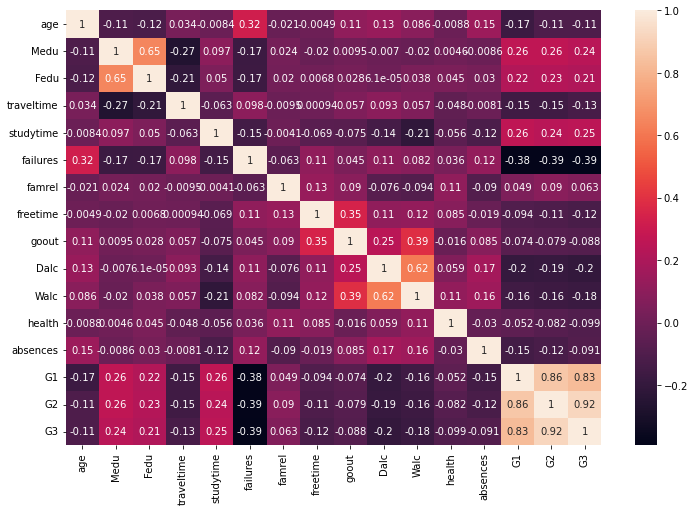

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

We can see in the above heatmap that G1, G2 and G3 are highly correlated(positively) and some another features such as failures,health, goout etc. have very low correlation i.e almost equal to zero. We may need to drop those features to improve our accuracy level of the model.

In [8]:
categorical_data=[feature for feature in df.columns if df[feature].values.dtype=='O']
len(categorical_data)

17

## Doing EDA on categorical data

In [9]:
for category in categorical_data:
    print(df[category].value_counts())

GP    423
MS    226
Name: school, dtype: int64
F    383
M    266
Name: sex, dtype: int64
U    452
R    197
Name: address, dtype: int64
GT3    457
LE3    192
Name: famsize, dtype: int64
T    569
A     80
Name: Pstatus, dtype: int64
other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64
other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64
course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64
mother    455
father    153
other      41
Name: guardian, dtype: int64
no     581
yes     68
Name: schoolsup, dtype: int64
yes    398
no     251
Name: famsup, dtype: int64
no     610
yes     39
Name: paid, dtype: int64
no     334
yes    315
Name: activities, dtype: int64
yes    521
no     128
Name: nursery, dtype: int64
yes    580
no      69
Name: higher, dtype: int64
yes    498
no     151
Name: internet, dtype: int64
no     410
yes    239
Name: romantic, 

## Checking whether our categorical features are balanced or not.

<Figure size 1440x1440 with 0 Axes>

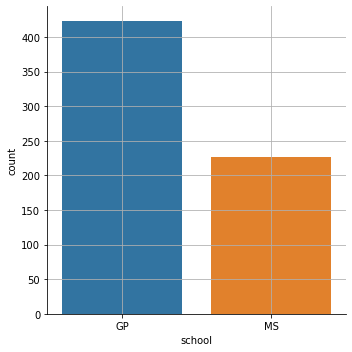

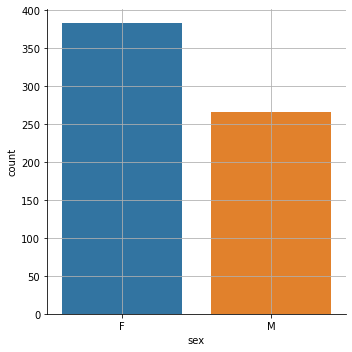

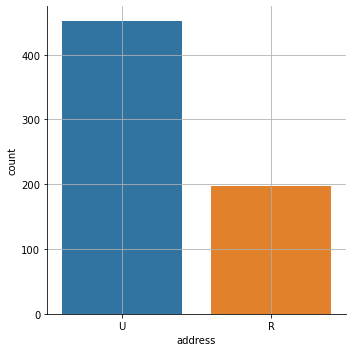

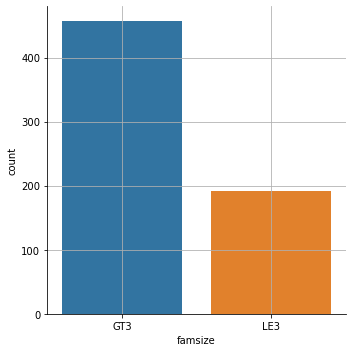

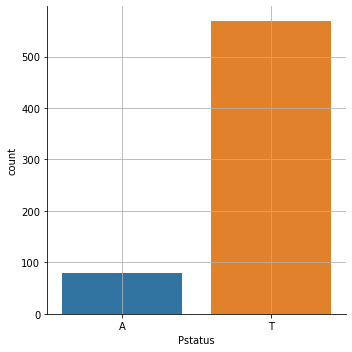

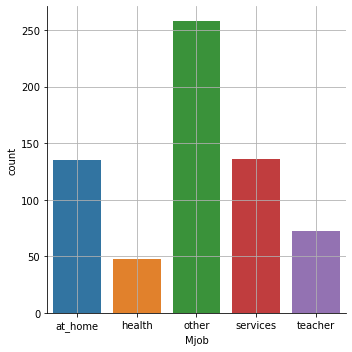

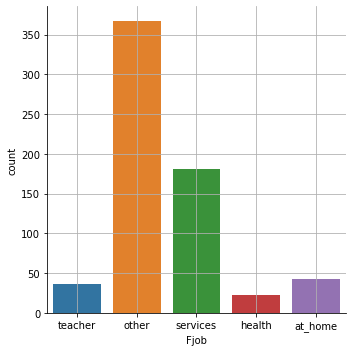

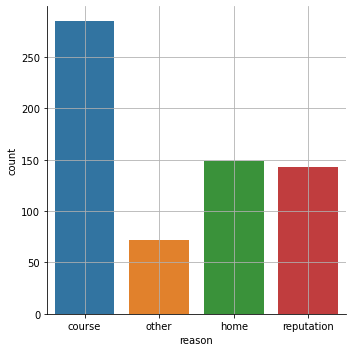

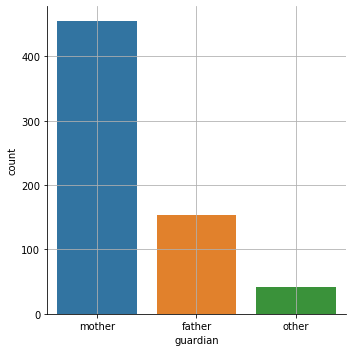

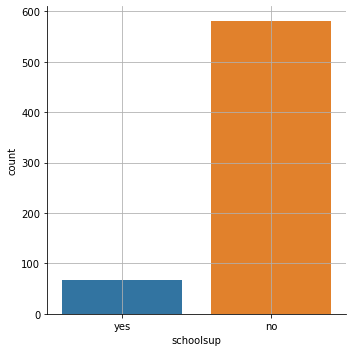

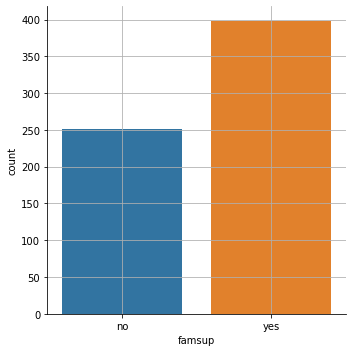

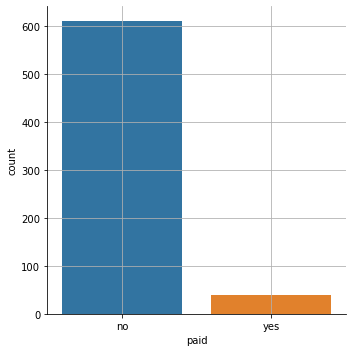

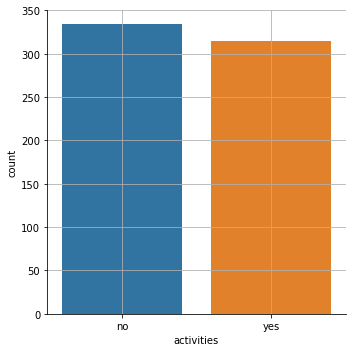

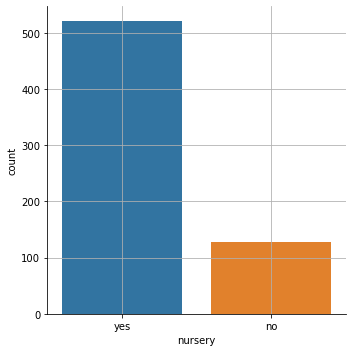

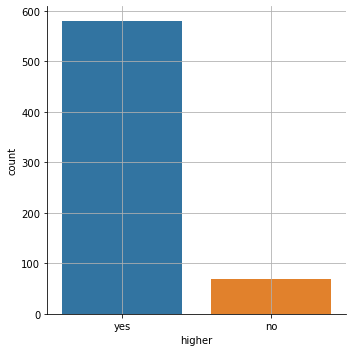

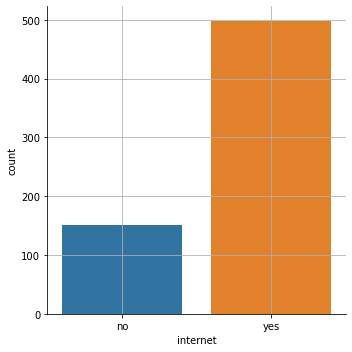

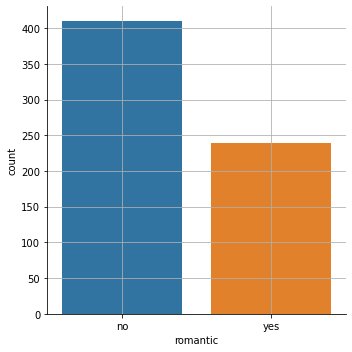

In [10]:
plt.figure(figsize=(20,20))
i=0
for category in categorical_data:
#     plt.subplot(len(categorical_data),2,i+1)
    sns.catplot(x=category,kind='count',data=df)
    plt.grid()
    i=i+1
plt.show()
    
# sns.catplot(x='school',kind='count',data=df)

From Above bar charts we can see that some features are poorly balanced. We may need to balance the dataset to get better results on our model.We shall balance our data on feature engineering section.

## Checking the distribution of continuous features

In [11]:
num_features=[feature for feature in df.columns if df[feature].values.dtype!='O']
num_features

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [12]:
con_feature=[feature for feature in num_features if len(df[feature].value_counts())>10]
con_feature

['absences', 'G1', 'G2', 'G3']

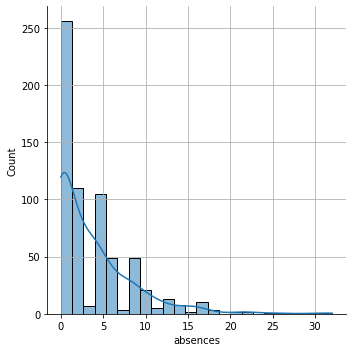

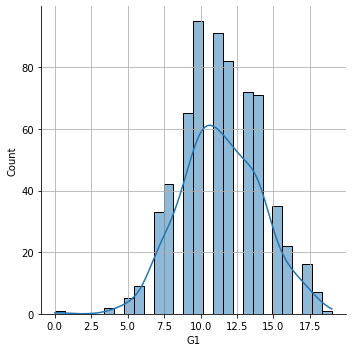

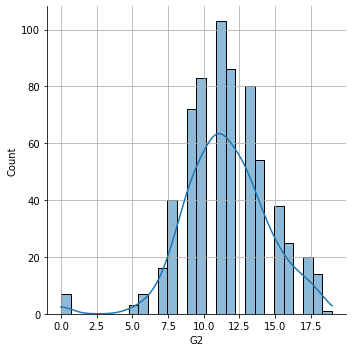

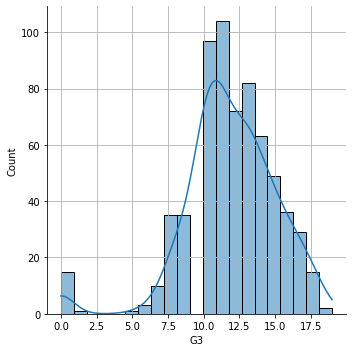

In [13]:
for feature in con_feature:
#     if feature!='G3':
    sns.displot(data=df,x=feature,kde=True)
    plt.grid()
    plt.show()
        

From above figures we can see that some of the features are not normally distributed we need to convert those features to normal distribution to get good results on our machine learning model.